In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = np.random.randint(1, 10, size=(8,2 ))
data

array([[7, 2],
       [9, 4],
       [4, 8],
       [2, 3],
       [2, 7],
       [5, 3],
       [6, 3],
       [6, 3]])

In [4]:
data.mean(axis=0)

array([5.125, 4.125])

In [6]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


# K-Means Clustering
### from scratch

In [1]:
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0, cluster_std=0.5)

In [2]:
data.shape

(2000, 2)

In [4]:
data[:5]

array([[-0.99610393,  2.32543854],
       [ 0.31831637,  4.07299503],
       [ 2.15418161,  0.94653906],
       [-1.41528725,  8.28928933],
       [-1.64417303,  2.48620447]])

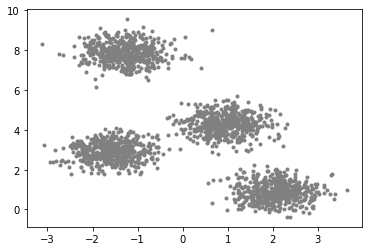

In [8]:
plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')

In [5]:
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [12]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

In [13]:
centroids

array([[-1.98815358,  7.90280365],
       [ 2.17484031,  1.59661179],
       [ 2.2726715 ,  1.16771089],
       [ 1.3626175 ,  3.47298818]])

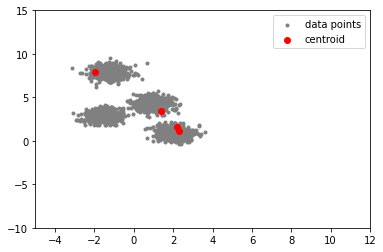

In [14]:
plot(data, centroids)

In [15]:
data.shape

(2000, 2)

In [16]:
centroids

array([[-1.98815358,  7.90280365],
       [ 2.17484031,  1.59661179],
       [ 2.2726715 ,  1.16771089],
       [ 1.3626175 ,  3.47298818]])

In [17]:
centroids[0]

array([-1.98815358,  7.90280365])

In [18]:
data[0]

array([-0.99610393,  2.32543854])

In [21]:
((data[0] - centroids[0])**2).sum()**0.5

5.664906359482375

In [22]:
((data[0] - centroids[1])**2).sum()**0.5

3.253625024858635

In [23]:
((data[0] - centroids[2])**2).sum()**0.5

3.467740779079051

In [24]:
((data[0] - centroids[3])**2).sum()**0.5

2.6230587002523613

In [33]:
((data[0] - centroids)**2).sum(axis=1)**0.5

array([5.66490636, 3.25362502, 3.46774078, 2.6230587 ])

In [34]:
((data - centroids[0])**2).sum(axis=1)**0.5

array([5.66490636, 4.47070886, 8.09620638, ..., 4.7639628 , 4.69276024,
       5.14632553])

In [37]:
def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((x - centroid)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist, distance])    
    return dist

In [38]:
euclidean(data, centroids)

array([[5.66490636, 3.25362502, 3.46774078, 2.6230587 ],
       [4.47070886, 3.09502101, 3.50145396, 1.20439738],
       [8.09620638, 0.6504009 , 0.250912  , 2.6475496 ],
       ...,
       [4.7639628 , 2.85139145, 3.28385206, 0.80745017],
       [4.69276024, 3.65601621, 3.95681811, 2.4270807 ],
       [5.14632553, 2.70980786, 3.14960036, 0.82805662]])

In [39]:
def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

In [40]:
get_closest_centroid(data, centroids)

array([3, 3, 2, ..., 3, 3, 3])

# K-Means

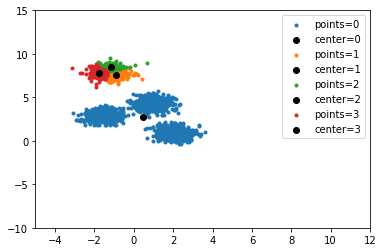

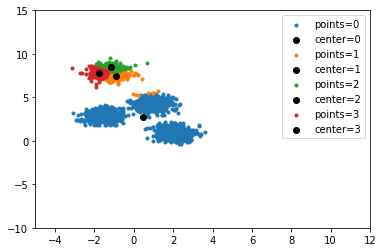

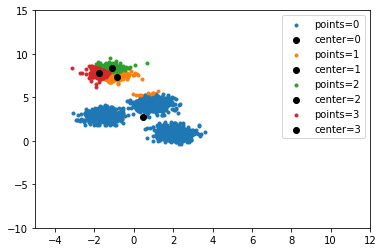

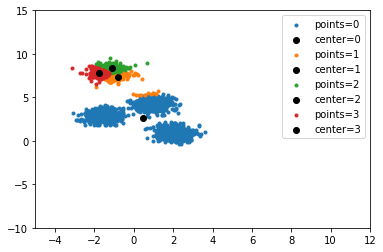

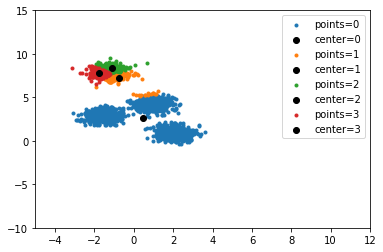

In [50]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]


# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)




def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index


animation_df = pd.DataFrame()  # only for animation



num_iters = 5
# Loop over iterations
for n in range(num_iters):  

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)
    
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    
     # only for animation (skip)
    adf = pd.DataFrame(data, columns=['x','y'])
    adf['color'] = assigned_centroids
    adf['size'] = 5
    cdf = pd.DataFrame(centroids, columns=['x','y'] )
    cdf['color'] = 'red'
    cdf['size'] = 20
    adf = pd.concat([adf, cdf])
    adf['frame'] = n
    animation_df = pd.concat([animation_df, adf])

    
    
    
    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        
        # assign the new centroidq
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()


In [45]:
import plotly.express as px

px.scatter(animation_df, x="x", y="y", animation_frame="frame", color="color", size='size', width=800, height=600)